In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import fit_library as fit_lib
import pandas as pd
%matplotlib nbagg
%reload_ext autoreload
%autoreload 2

In [63]:
# DATA
TH_HIGH = 1.414
TH_LOW = 0.404
Cint = 6.18E-12
GATE = 500E-9
pQ = 1E-12
Ileak = 3.52E-6  # Computed from an empty input flip (dV*Cint/GATE)

Qu = (TH_HIGH-TH_LOW)*Cint / pQ

In [64]:
pe_density = ["200pe","100pe","50pe","25pe"]
#pe_density = ["200pe"]
df = pd.DataFrame(columns=['pe_density','Q_true','Q_measured','Qu','N_flips','Q_residue'])



In [65]:
n_pe = 750
for pe in pe_density:
        for set in range(1,101):
            file = "_" + pe + "500ns_"+str(n_pe)+"pe"+ "_set" + str(set) + ".txt"
            
            Q_total = np.array(pd.read_csv("/home/viherbos/TEMP/results/Qtotal"+ file ,header=None))
            residue=pd.read_csv("/home/viherbos/TEMP/results/residue"+ file,header=None,skiprows=2,sep="    ")
            counter=pd.read_csv("/home/viherbos/TEMP/results/counter"+ file,header=None,skiprows=2,sep="    ")
            residue = (residue.to_numpy()-TH_LOW)*Cint / pQ
            counter = counter.to_numpy()
                        
            residue_t = np.sum(residue[:,1])
            entero = np.array(counter[:,1], dtype='int')
            binario = np.array(entero[:], dtype='str')
            flips = 0
            n_gates = len(binario)
            for i in range(n_gates):
                flips = flips + int(binario[i],2)
            q_meas = flips*Qu + residue_t - Ileak*GATE*n_gates/pQ
            
            aux_pd = pd.DataFrame(data={'pe_density':[pe], 'Q_true':[Q_total[0,0]/pQ], 'Q_measured':[q_meas],
                                                'Qu':[Qu], 'N_flips':[flips], 'Q_residue':[residue_t]})
            df = df.append(aux_pd, ignore_index=True)

<ipython-input-65-3be43a2c13e1>:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  residue=pd.read_csv("/home/viherbos/TEMP/results/residue"+ file,header=None,skiprows=2,sep="    ")
<ipython-input-65-3be43a2c13e1>:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  counter=pd.read_csv("/home/viherbos/TEMP/results/counter"+ file,header=None,skiprows=2,sep="    ")


In [66]:
df

,pe_density,Q_true,Q_measured,Qu,N_flips,Q_residue
0,200pe,155.968,154.707195,6.2418,23,19.945796
1,200pe,155.968,154.708549,6.2418,23,19.947149
2,200pe,155.968,148.270410,6.2418,23,13.509010
3,200pe,155.968,154.616319,6.2418,23,19.854919
4,200pe,155.971,154.661661,6.2418,24,13.658461
...,...,...,...,...,...,...
395,25pe,155.996,156.382607,6.2418,22,73.623007
396,25pe,155.996,156.470629,6.2418,22,73.711029
397,25pe,155.997,150.199369,6.2418,24,54.956169
398,25pe,155.997,156.397829,6.2418,23,67.396429


In [67]:
df_25pe=df[df['pe_density']=="25pe"]
df_50pe=df[df['pe_density']=="50pe"]
df_100pe=df[df['pe_density']=="100pe"]
df_200pe=df[df['pe_density']=="200pe"]
df_200pe.loc[:,'error']=df_200pe['Q_true']-df_200pe['Q_measured']
df_100pe.loc[:,'error']=df_100pe['Q_true']-df_100pe['Q_measured']
df_50pe.loc[:,'error']=df_50pe['Q_true']-df_50pe['Q_measured']
df_25pe.loc[:,'error']=df_25pe['Q_true']-df_25pe['Q_measured']

/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


Resolution 25pe =  1.8918886124400625
Accuracy 25pe =  0.08334758254038611
Number of flips (mean) =  22.75


Resolution 50pe =  0.8419651296254707
Accuracy 50pe =  -0.14499233781497875
Number of flips (mean) =  20.59


Resolution 100pe =  1.682069871448618
Accuracy 100pe =  0.43704382555237986
Number of flips (mean) =  23.29


Resolution 200pe =  0.48522842463448446
Accuracy 200pe =  0.7945100462445531
Number of flips (mean) =  23.7


<IPython.core.display.Javascript object>


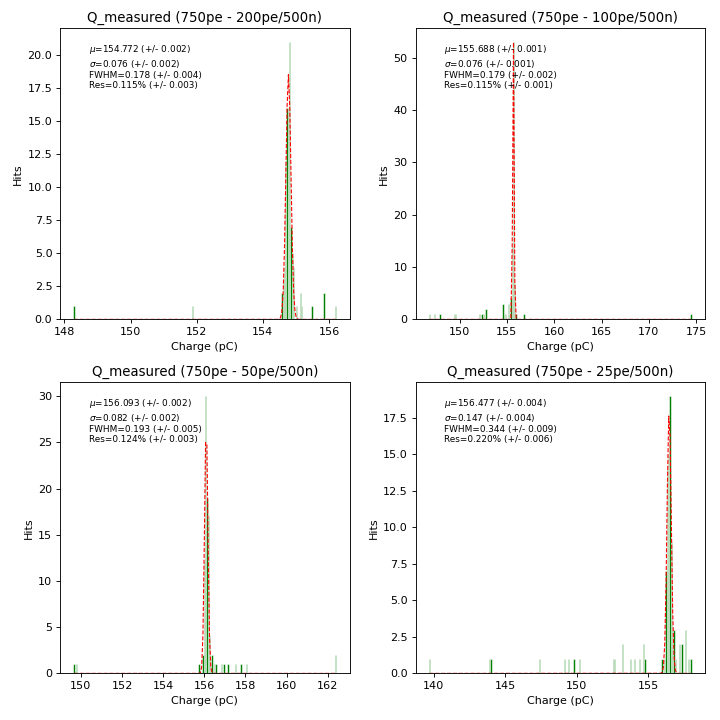

In [111]:
print("Resolution 25pe = ", np.std(df_25pe['Q_measured'])/np.mean(df_25pe['Q_measured'])*100)
print("Accuracy 25pe = ", np.mean(df_25pe['error']/np.mean(df_25pe['Q_measured'])*100))
print("Number of flips (mean) = ", np.mean(df_25pe['N_flips']))
print("\n")
print("Resolution 50pe = ", np.std(df_50pe['Q_measured'])/np.mean(df_50pe['Q_measured'])*100)
print("Accuracy 50pe = ", np.mean(df_50pe['error']/np.mean(df_25pe['Q_measured'])*100))
print("Number of flips (mean) = ", np.mean(df_50pe['N_flips']))
print("\n")
print("Resolution 100pe = ", np.std(df_100pe['Q_measured'])/np.mean(df_100pe['Q_measured'])*100)
print("Accuracy 100pe = ", np.mean(df_100pe['error']/np.mean(df_25pe['Q_measured'])*100))
print("Number of flips (mean) = ", np.mean(df_100pe['N_flips']))
print("\n")
print("Resolution 200pe = ",np.std(df_200pe['Q_measured'])/np.mean(df_200pe['Q_measured'])*100)
print("Accuracy 200pe = ", np.mean(df_200pe['error']/np.mean(df_25pe['Q_measured'])*100))
print("Number of flips (mean) = ", np.mean(df_200pe['N_flips']))

fit_pe = fit_lib.gauss_fit()
fig = plt.figure(figsize=(9,9))

fit_pe(df_200pe['Q_measured'],200)
fit_pe.plot(axis = fig.add_subplot(221),
            title = 'Q_measured (750pe - 200pe/500n)',
            xlabel = 'Charge (pC)',
            ylabel = 'Hits',text_pos=[0.1,0.95,"left"])
fit_pe(df_100pe['Q_measured'],200)
fit_pe.plot(axis = fig.add_subplot(222),
            title = 'Q_measured (750pe - 100pe/500n)',
            xlabel = 'Charge (pC)',
            ylabel = 'Hits',text_pos=[0.1,0.95,"left"])
fit_pe(df_50pe['Q_measured'],200)
fit_pe.plot(axis = fig.add_subplot(223),
            title = 'Q_measured (750pe - 50pe/500n)',
            xlabel = 'Charge (pC)',
            ylabel = 'Hits',text_pos=[0.1,0.95,"left"])
fit_pe(df_25pe['Q_measured'],200)
fit_pe.plot(axis = fig.add_subplot(224),
            title = 'Q_measured (750pe - 25pe/500n)',
            xlabel = 'Charge (pC)',
            ylabel = 'Hits',text_pos=[0.1,0.95,"left"])

fig.tight_layout()

In [97]:
a=df_200pe[(df_200pe['Q_measured']>154.5) & (df_200pe['Q_measured']<155.1)]

np.std(a['Q_measured'])

0.08021296798193496

In [40]:
df_100pe

,pe_density,Q_true,Q_measured,Qu,N_flips,Q_residue,error
20,100pe,155.964,155.743193,6.2418,23,26.261793,0.220807
21,100pe,155.962,155.656462,6.2418,22,32.416862,0.305538
22,100pe,155.963,155.683222,6.2418,23,26.201822,0.279778
23,100pe,155.962,155.657569,6.2418,24,19.934369,0.304431
24,100pe,155.958,153.469305,6.2418,23,23.987905,2.488695
25,100pe,155.962,155.528370,6.2418,24,19.805170,0.433630
26,100pe,155.963,155.790661,6.2418,23,26.309261,0.172339
27,100pe,155.961,155.698765,6.2418,23,26.217365,0.262235
28,100pe,155.962,155.709487,6.2418,24,19.986287,0.252513
29,100pe,155.961,155.624141,6.2418,24,19.900941,0.336859


In [143]:
df_25pe.reset_index(inplace=True)
df_50pe.reset_index(inplace=True)
df_100pe.reset_index(inplace=True)
df_200pe.reset_index(inplace=True)



In [148]:
df_25pe.loc[df_25pe['error'].idxmax()]

level_0            24
index             324
pe_density       25pe
Q_true        149.529
Q_measured    139.639
Qu             6.2418
N_flips            18
Q_residue     81.8464
error         9.89024
Name: 24, dtype: object

In [145]:
df_25pe.loc[24]

level_0            24
index             324
pe_density       25pe
Q_true        149.529
Q_measured    139.639
Qu             6.2418
N_flips            18
Q_residue     81.8464
error         9.89024
Name: 24, dtype: object

df_25pe

In [146]:
df_25pe

,level_0,index,pe_density,Q_true,Q_measured,Qu,N_flips,Q_residue,error
0,0,300,25pe,155.986,156.510540,6.2418,23,67.509140,-0.524540
1,1,301,25pe,156.003,156.701780,6.2418,26,48.974980,-0.698780
2,2,302,25pe,155.990,156.445792,6.2418,23,67.444392,-0.455792
3,3,303,25pe,155.993,156.417895,6.2418,23,67.416495,-0.424895
4,4,304,25pe,153.017,149.779296,6.2418,20,79.503296,3.237704
...,...,...,...,...,...,...,...,...,...
95,95,395,25pe,155.996,156.382607,6.2418,22,73.623007,-0.386607
96,96,396,25pe,155.996,156.470629,6.2418,22,73.711029,-0.474629
97,97,397,25pe,155.997,150.199369,6.2418,24,54.956169,5.797631
98,98,398,25pe,155.997,156.397829,6.2418,23,67.396429,-0.400829
